In [3]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
# Data is here
f = "../data/test/yeast/analysis/ps.txt"
fpath = "/".join(f.split("/")[:-1])

In [5]:
# Read in file
df = pd.read_csv(f, sep = "\t")
df.head()

,Accession,Node:0,Node:1,Node:2,Node:3,Node:4,Node:5,Seq:0,Seq:1,Seq:2,Seq:3,Seq:4,Seq:5
0,ABQ_6.ChrX,0,336,891,1785,6630,7655,0,47050,3792,12833,73540,597805
1,BIH_4.ChrX,0,278,764,1753,6592,7655,0,26389,2445,12195,73030,597805
2,ABF_6.ChrX,0,2180,1092,1204,5213,7655,0,33119,5968,12122,71557,597805
3,BPN_2.ChrX,0,1246,687,916,5163,7655,0,104349,5349,1650,9887,597805
4,BCK_8.ChrX,0,3275,948,1062,3734,7655,0,53334,4054,2600,67558,597805


In [6]:
# Sequence starts here
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

7

In [7]:
# Data starts here
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Node")][0]+1
start_index

2

In [8]:
# Node stats
node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_priv = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [9]:
# Create a DataFrame
df2 = pd.DataFrame([node_core, node_soft, node_priv]).T
df2.head()

,0,1,2
0,7655,9306,336
1,7655,9109,278
2,7655,7509,2180
3,7655,6766,1246
4,7655,5744,3275


In [10]:
# Change index and column name
df2.columns = ["Core", "Soft", "Private"]
df2.index = [x.split("_")[0] for x in df["Accession"]]
df2.head()

,Core,Soft,Private
ABQ,7655,9306,336
BIH,7655,9109,278
ABF,7655,7509,2180
BPN,7655,6766,1246
BCK,7655,5744,3275


In [11]:
# Update the index (remove the haplotype and contig/scaffold name)
df2.index = [x.split("#")[0] for x in df2.index]

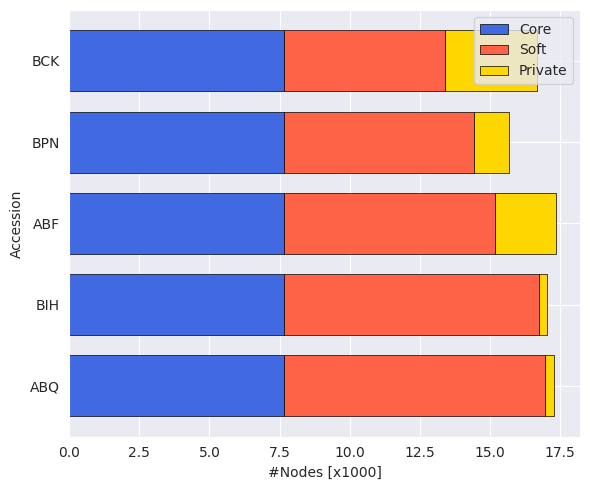

In [12]:
#Plot the nodes
(df2/1000).plot(kind = "barh", stacked = True, figsize = (6,5), width = 0.75, legend = True,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("#Nodes [x1000]")
plt.ylabel("Accession")
plt.tight_layout()
#plt.savefig("plots/ps.similarity_path.400.png", dpi = 400)
#plt.savefig("plots/ps.similarity_path.pdf")


# Sequence

In [13]:
# Do the same with sequence
seq_soft = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
seq_core = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
seq_priv = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)

In [14]:
# Read in DataFrame
df2 = pd.DataFrame([seq_core, seq_soft, seq_priv]).T
df2.head()

,0,1,2
0,597805,137215,0
1,597805,114059,0
2,597805,122766,0
3,597805,121235,0
4,597805,127546,0


In [15]:
# Change index and column name
df2.columns = ["Core", "Soft", "Private"]
df2.index = [x.split("_")[0] for x in df["Accession"]]
df2.head()

,Core,Soft,Private
ABQ,597805,137215,0
BIH,597805,114059,0
ABF,597805,122766,0
BPN,597805,121235,0
BCK,597805,127546,0


In [16]:
# Update index (s. above)
df2.index = [x.split("#")[0] for x in df2.index]

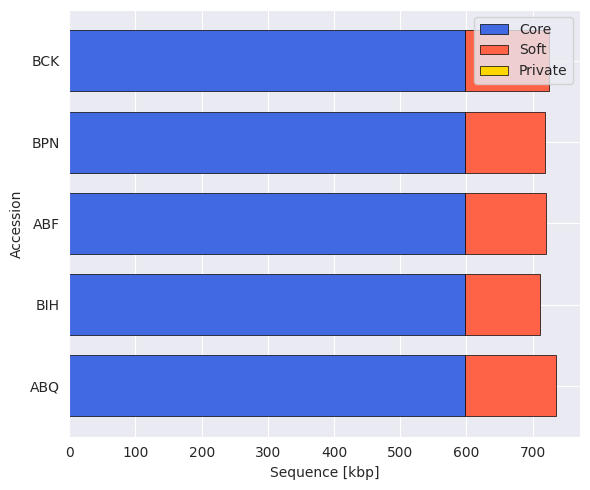

In [17]:
# Plot
(df2/1000).plot(kind = "barh", stacked = True, figsize = (6,5), width = 0.75, legend = True,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("Sequence [kbp]")
plt.ylabel("Accession")
plt.tight_layout()
#plt.savefig("plots/ps.similarity_path.seq.pdf")
